In [1]:
import pandas as pd
import numpy as np

from spn import LogicalArithmeticSPN

import networkx as nx

In [2]:
df = pd.read_csv('data/postdigits.txt', sep=' ')
df

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1,1,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,1,0
3,2,0,1,1,0,0,1,0,0,1
4,2,0,0,1,1,1,1,0,0,1
5,2,0,1,1,0,0,1,1,0,0
6,3,0,1,0,0,1,0,1,0,1
7,3,1,0,1,0,1,0,1,0,1
8,3,1,0,1,0,1,1,0,0,1
9,3,0,1,0,0,1,1,0,0,1


In [3]:
Y = df['y'].values
X = np.c_[tuple(df['x'+str(i+1)] for i in range(9))]
X = [tuple(row) for row in X]
print(Y)
print(X)

[1 1 1 2 2 2 3 3 3 3 4 4 5 5 6 6 7 7 7 8 9 9 9 0]
[(1, 0, 0, 0, 0, 1, 1, 0, 0), (1, 0, 0, 0, 0, 1, 0, 0, 0), (0, 0, 0, 1, 0, 0, 0, 1, 0), (0, 1, 1, 0, 0, 1, 0, 0, 1), (0, 0, 1, 1, 1, 1, 0, 0, 1), (0, 1, 1, 0, 0, 1, 1, 0, 0), (0, 1, 0, 0, 1, 0, 1, 0, 1), (1, 0, 1, 0, 1, 0, 1, 0, 1), (1, 0, 1, 0, 1, 1, 0, 0, 1), (0, 1, 0, 0, 1, 1, 0, 0, 1), (1, 0, 0, 0, 1, 1, 0, 1, 0), (1, 0, 0, 0, 1, 1, 1, 0, 0), (1, 0, 1, 0, 1, 0, 0, 1, 1), (0, 1, 0, 0, 1, 0, 0, 1, 1), (1, 0, 1, 1, 1, 0, 1, 0, 0), (1, 0, 1, 1, 1, 0, 0, 1, 1), (0, 0, 0, 1, 0, 0, 1, 0, 1), (1, 0, 0, 0, 0, 1, 0, 0, 1), (0, 1, 0, 0, 0, 1, 0, 0, 1), (1, 0, 1, 1, 1, 1, 0, 1, 1), (0, 1, 0, 0, 1, 1, 0, 1, 1), (1, 0, 1, 0, 1, 1, 0, 1, 1), (1, 0, 0, 0, 1, 1, 0, 1, 1), (1, 0, 1, 1, 0, 1, 0, 1, 1)]


In [4]:
N = len(Y)
Ys = []
for j in range(10):
    Yj = np.zeros(N)
    for i,y in enumerate(Y):
        if y == j:
            Yj[i] = 1
    print(j, Yj)
    Ys.append(Yj)    

0 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
7 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.]


In [5]:
spn_list = []
for j in range(10):
    spn = LogicalArithmeticSPN()
    spn.fit(X, Ys[j])
    print(j, spn.mindices, spn.weights, all(spn.evaluate_all(X) == Ys[j]))
    spn_list.append(spn)

0 [(7,), (3, 5, 7), (2, 3, 4, 7)] [-1, 1, -1] False
1 [(6,), (5, 6), (1, 4)] [-1, 1, -1] False
2 [(7,), (2, 5), (0, 4, 7), (2, 4), (1, 5, 7)] [-1, 1, -1, 1, -1] False
3 [(7,), (1, 6), (2, 5), (0, 6, 8), (3, 4, 6)] [-1, 1, -1, 1, -1] False
4 [(7,), (0, 4, 7), (2, 4)] [-1, 1, -1] False
5 [(7,), (1, 4), (1, 6), (0, 2, 4), (0, 6, 8)] [-1, 1, -1, 1, -1] False
6 [(7,), (3, 4, 6), (2, 5, 7), (2, 3, 4, 7), (0, 3, 4, 5, 7, 8)] [-1, 1, -1, 1, -1] False
7 [(7,), (6,), (5, 6)] [-1, 1, -1] False
8 [(7,), (0, 3, 4, 5, 7, 8)] [-1, 1] False
9 [(7,), (1, 5, 7), (0, 2, 4), (2, 5, 7), (3, 5, 7)] [-1, 1, -1, 1, -1] False


In [6]:
from IPython import display
text = r'\begin{eqnarray}'
for i in range(10):
    text += r"\mathrm{spn}_%s &=& %s\\" % (i, spn_list[i].latex()[1:-1])
text += r'\end{eqnarray}'
display.Latex(text)


<IPython.core.display.Latex object>

In [7]:
import networkx as nx

In [8]:
def plot_spn_digraph(spn):
    g = nx.DiGraph()

    x_list = []
    P_list = []

    edge_labels ={}
    
    m = len(spn.mindices)
    for i in range(m):
        P = 'P'+str(i+1)
        if P not in P_list:
            P_list.append(P)

        mi = spn.mindices[i]
        for t in mi:
            x = 'x'+str(t+1)
            if x not in x_list:
                x_list.append(x)
            key = (x, P)
            g.add_edge(*key)

        S = 'S'
        g.add_edge(P, S)
        key = (P, S)
        g.add_edge(*key)
        edge_labels[key] = spn.weights[i]
        H = 'H'
        g.add_edge(S, H)
        y = 'y'
        g.add_edge(H, y)

    node_colors = []
    for node in g.nodes:
        c = node[0]
        if c == 'x':
            node_colors.append('gray')
        elif c == 'P':  
            node_colors.append('g')
        elif c == 'S':  
            node_colors.append('b')
        elif c == 'H':  
            node_colors.append('m')
        elif c == 'y':  
            node_colors.append('gray')
            
    ax = plt.gca()
    pos = nx.drawing.layout.shell_layout(g, nlist=[x_list, P_list, ['S'], ['H'], ['y']], center=(0,0))
    nx.draw_networkx(g, pos=pos, with_label=True, arrows=True, ax=ax, 
                     node_color=node_colors)
    nx.draw_networkx_edge_labels(g, pos=pos, ax=ax, edge_labels=edge_labels)
#     ax.legend()
            

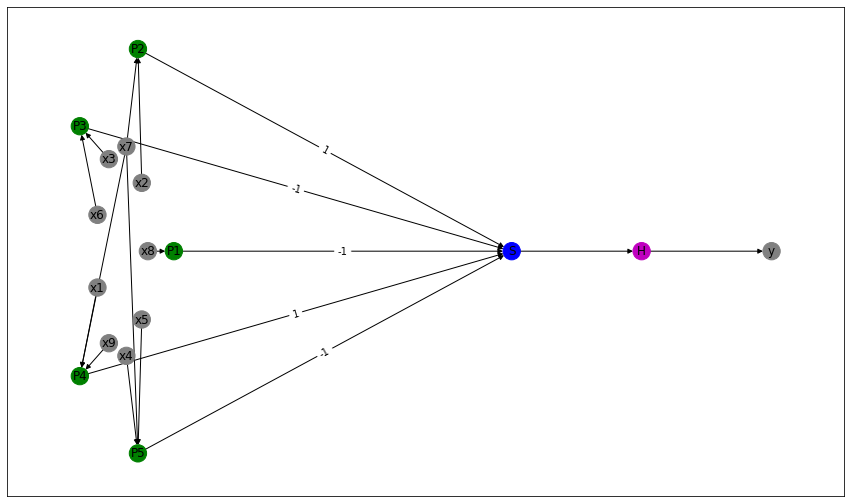

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plot_spn_digraph(spn_list[3])
plt.savefig("post3.jpg")

In [10]:
g = nx.DiGraph()
mindices = []
for i,spn in enumerate(spn_list):
    print(i+1, spn.mindices)
    for mi in spn.mindices:
        if mi not in mindices:
            mindices.append(mi)
#print(mindices)
x_list = []
P_list = []
S_list = []
H_list = []
y_list = []
for i, mi in enumerate(mindices):
    for t in mi:
        x = 'x'+str(t+1)
        P = 'P'+str(i+1)
        if x not in x_list:
            x_list.append(x)
        if P not in P_list:
            P_list.append(P)
        key = (x, P)
        g.add_edge(*key)

edge_labels = {}
for i, spn in enumerate(spn_list):
    S = 'S'+str(i+1)
    if S not in S_list:
        S_list.append(S)
    for mi, w in zip(spn.mindices, spn.weights):
        j = mindices.index(mi) + 1
        P = 'P'+str(j+1)
        if P not in P_list:
            P_list.append(P)
        key = (P, S)
        g.add_edge(*key)
        edge_labels[key] = w
    H = 'H'+str(i+1)
    if H not in H_list:
        H_list.append(H)
    y = 'y'+str(i+1)
    if y not in y_list:
        y_list.append(y)
    g.add_edge(S, H)        
    g.add_edge(H, y)
node_colors = []
for node in g.nodes:
    c = node[0]
    if c == 'x':
        node_colors.append('gray')
    elif c == 'P':  
        node_colors.append('g')
    elif c == 'S':  
        node_colors.append('b')
    elif c == 'H':  
        node_colors.append('m')
    elif c == 'y':  
        node_colors.append('gray')
        

1 [(7,), (3, 5, 7), (2, 3, 4, 7)]
2 [(6,), (5, 6), (1, 4)]
3 [(7,), (2, 5), (0, 4, 7), (2, 4), (1, 5, 7)]
4 [(7,), (1, 6), (2, 5), (0, 6, 8), (3, 4, 6)]
5 [(7,), (0, 4, 7), (2, 4)]
6 [(7,), (1, 4), (1, 6), (0, 2, 4), (0, 6, 8)]
7 [(7,), (3, 4, 6), (2, 5, 7), (2, 3, 4, 7), (0, 3, 4, 5, 7, 8)]
8 [(7,), (6,), (5, 6)]
9 [(7,), (0, 3, 4, 5, 7, 8)]
10 [(7,), (1, 5, 7), (0, 2, 4), (2, 5, 7), (3, 5, 7)]


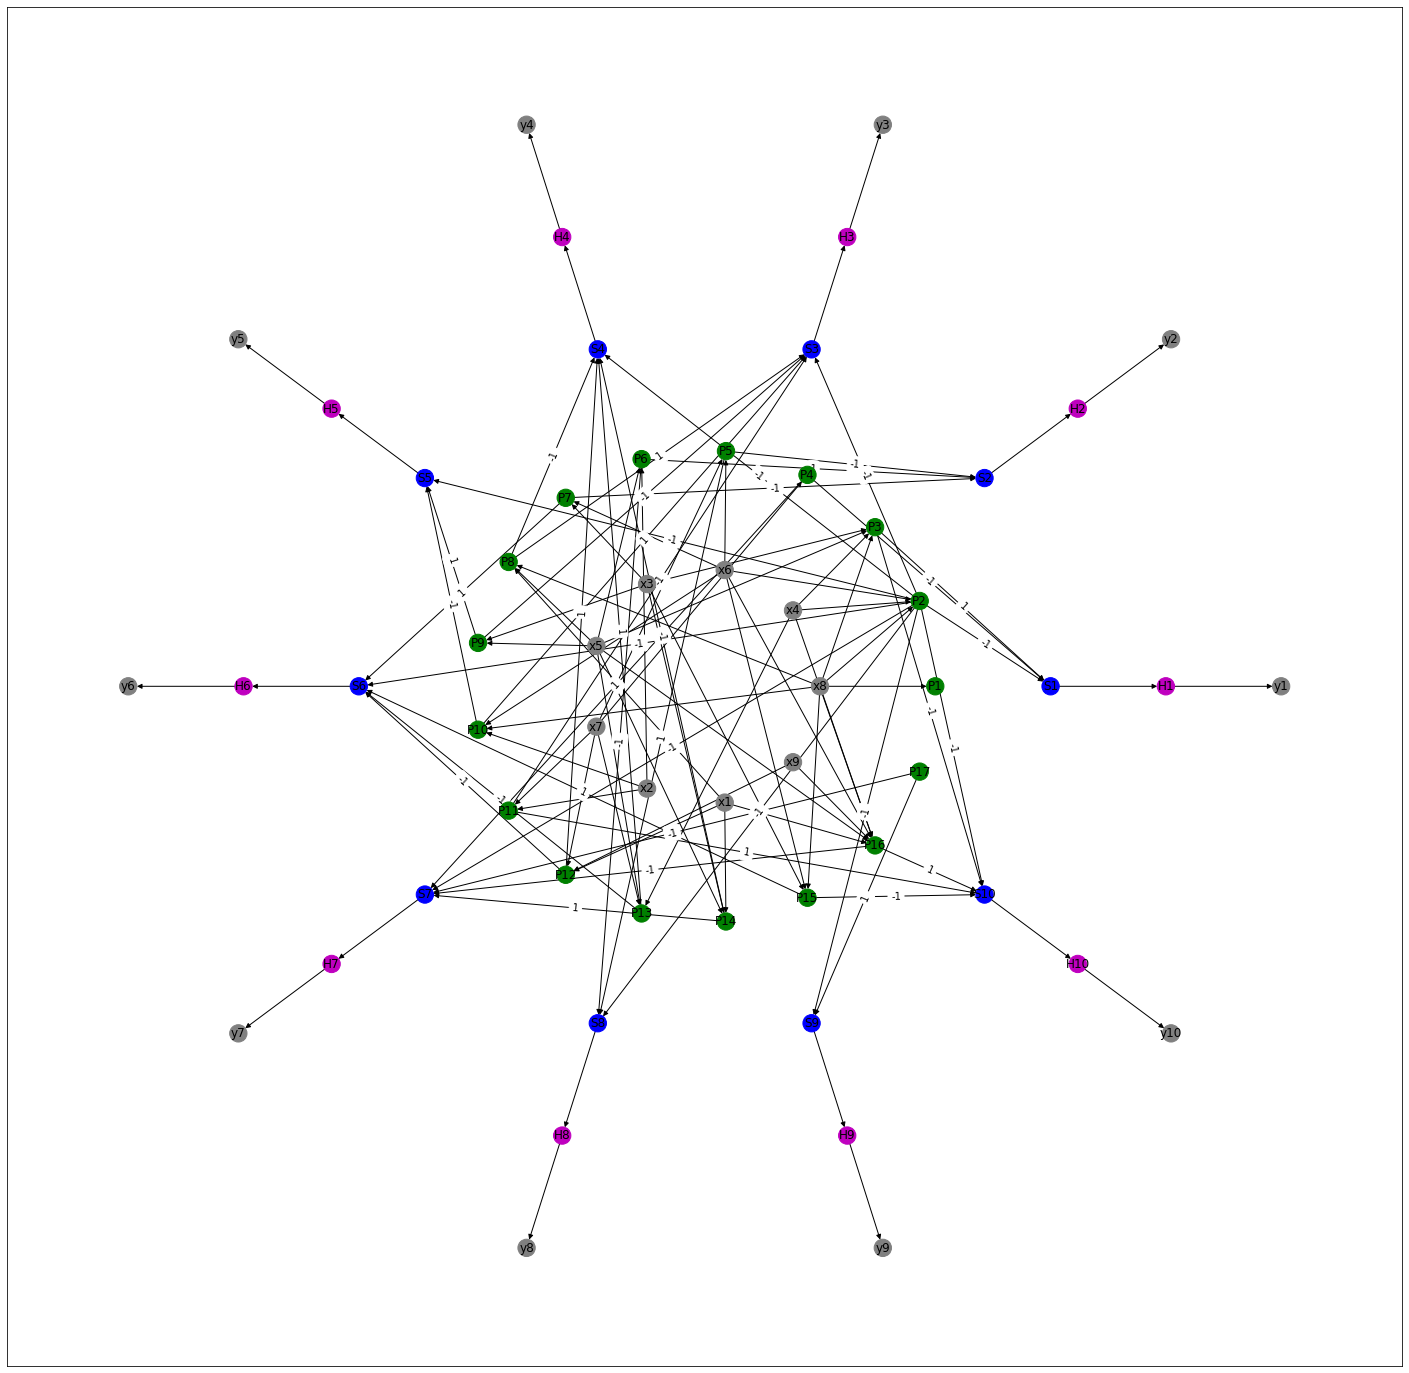

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
ax = plt.gca()
pos = nx.drawing.layout.shell_layout(g, scale=1., nlist=[x_list, P_list, S_list, H_list, y_list])
nx.draw_networkx(g, pos=pos, with_label=True, arrows=True, ax=ax, 
                 node_color=node_colors)
nx.draw_networkx_edge_labels(g, pos=pos, with_label=True, arrows=True, ax=ax, 
                             node_color=node_colors, edge_labels = edge_labels)
plt.savefig('spn.jpg')
plt.show()